# API's and Web Scraping

In [108]:
import pandas as pd
import requests

In [109]:
key = "Rcy1cGyJxIQEZ03vbgrHhRAlGVONQVudexalKak0"
#This is the key needed to access the information we need. If we do not have this, we cannot get the info we want
link = "https://api.nasa.gov/neo/rest/v1/feed?start_date=2023-10-31&end_date=2023-10-31&api_key="
html = requests.get(link)
data = requests.get(link + key).json()
data
#the request uses the link and the key that we have to access the information we want. The following is what it looks like. Kinda messy, right?

{'links': {'next': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2023-11-01&end_date=2023-11-01&detailed=false&api_key=Rcy1cGyJxIQEZ03vbgrHhRAlGVONQVudexalKak0',
  'prev': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2023-10-30&end_date=2023-10-30&detailed=false&api_key=Rcy1cGyJxIQEZ03vbgrHhRAlGVONQVudexalKak0',
  'self': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2023-10-31&end_date=2023-10-31&detailed=false&api_key=Rcy1cGyJxIQEZ03vbgrHhRAlGVONQVudexalKak0'},
 'element_count': 7,
 'near_earth_objects': {'2023-10-31': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/3564590?api_key=Rcy1cGyJxIQEZ03vbgrHhRAlGVONQVudexalKak0'},
    'id': '3564590',
    'neo_reference_id': '3564590',
    'name': '(2011 JA)',
    'nasa_jpl_url': 'https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=3564590',
    'absolute_magnitude_h': 21.44,
    'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.1369477737,
      'estimated_diameter_max': 0.3062245314},
     'meters': 

In [110]:
info_list = []
near_earth_objects = data['near_earth_objects']
for date in near_earth_objects:
    for asteroid in near_earth_objects[date]:
        nm = asteroid['name']
        iD = asteroid['id']
        neo_reference_id=asteroid['neo_reference_id']
        mag=asteroid['absolute_magnitude_h']
        dmeter_max = asteroid['estimated_diameter']['kilometers']['estimated_diameter_max']
        dmeter_min=asteroid['estimated_diameter']['kilometers']['estimated_diameter_min']
        haz=asteroid['is_potentially_hazardous_asteroid']
        dis = asteroid['close_approach_data'][0]['miss_distance']['kilometers']
        new = {'Name': nm, 'ID': iD, 'Neo Id': neo_reference_id, 'Magnitude': mag, 'Max Diameter (Km)': dmeter_max, 'Min Diameter (Km)': dmeter_min, 'Potentially Hazardous': haz, 'Miss Distance (km)': dis}
        info_list.append(new)
        
info = pd.DataFrame(info_list)
info
#To make sense of the above data, I decided to create a new dataset using the definitions in the data above
#I did this by setting near_earth_objects =  to the biggest dictionary. Makes running the code a bit more efficient
#Then I got each individual dictionary. There are more that I did not get, but above is the general idea
#Then I put it all together into a blank dataset, info_list, using append to get the following

,Name,ID,Neo Id,Magnitude,Max Diameter (Km),Min Diameter (Km),Potentially Hazardous,Miss Distance (km)
0,(2011 JA),3564590,3564590,21.44,0.306225,0.136948,True,31506910.997224975
1,(2016 HV3),3752454,3752454,20.10,0.567597,0.253837,True,10620891.592733185
2,(2017 WO1),3789480,3789480,24.25,0.083954,0.037545,False,21729703.953807213
3,(2018 WE2),3836413,3836413,25.85,0.040183,0.017970,False,49895457.541161515
4,(2020 TE),54054746,54054746,24.77,0.066075,0.029550,False,71286880.065157449
5,(2020 UU1),54075321,54075321,28.50,0.011859,0.005303,False,40366609.365967808
6,(2020 VT3),54087760,54087760,28.90,0.009864,0.004411,False,37208609.116274235


# DataSets

In [79]:
import pandas as pd
import math

In [111]:
data2 = pd.read_csv("StreamingHistory0.csv")
data2
#Here I am obtaining the file that I want and printing it just by calling it

,endTime,artistName,trackName,msPlayed
0,2022-10-25 21:52,OneRepublic,Start Again (feat. Logic),24568
1,2022-10-25 23:17,Train,"Hey, Soul Sister",151917
2,2022-10-26 02:08,American Authors,I'm Born To Run,80860
3,2022-10-26 03:13,American Authors,I'm Born To Run,280300
4,2022-10-26 03:15,Kardinal Offishall,Due Me A Favour,141857
...,...,...,...,...
9995,2023-03-08 08:05,Arden Jones,SMILE,161000
9996,2023-03-08 08:08,Marshmello,Silence,180822
9997,2023-03-08 08:12,Tjuvjakt,Tandtråd,242320
9998,2023-03-08 08:16,Ekipa,Chill,265135


In [101]:
song_data=data2.copy()
song_data['Times Played']= song_data.groupby(['artistName', 'trackName'])['trackName'].transform('count')
song_data = song_data.sort_values(by='Times Played', ascending=False)
song_data = song_data.drop_duplicates(subset=['trackName'])
song_data
#Here is some added code to figure out how many time I played each song. I did this by using groupby() 
#and sorting the values from highest to lowest. I also added the drop_duplicates() so that there would not 
#be two of any song

,endTime,artistName,trackName,msPlayed,Times Played
3115,2022-11-30 23:17,Ying Yang Twins,Badd,18190,65
1499,2022-11-10 00:25,Snoop Dogg,"Young, Wild & Free (feat. Bruno Mars)",3250,45
8091,2023-02-11 16:18,WildVibes,Under Tonight,177738,39
336,2022-10-30 03:30,Creed,With Arms Wide Open,455489,38
9301,2023-02-28 11:24,Vance Joy,Riptide,204280,35
...,...,...,...,...,...
7333,2023-02-04 00:14,Taio Cruz,Higher,94919,1
3918,2022-12-13 08:30,Moby,Going Wrong,223083,1
5508,2023-01-04 22:16,P!nk,Just Give Me a Reason (feat. Nate Ruess),83027,1
2076,2022-11-16 23:50,Andy Grammer,Fine By Me,172893,1


In [83]:
song_data.index

Int64Index([3115, 1499, 8091,  336, 9301, 8096, 9083, 6391, 2843, 2859,
            ...
            5529, 4625, 2572, 7335, 4067, 7333, 3918, 5508, 2076, 7421],
           dtype='int64', length=1779)

In [84]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 3115 to 7421
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   endTime       1779 non-null   object
 1   artistName    1779 non-null   object
 2   trackName     1779 non-null   object
 3   msPlayed      1779 non-null   int64 
 4   Times Played  1779 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 147.9+ KB


In [86]:
song_data.describe()

,msPlayed,Times Played
count,1779.000000,1779.000000
mean,177613.116358,5.604834
std,105202.770770,6.650744
min,0.000000,1.000000
25%,115900.500000,1.000000
50%,190013.000000,2.000000
75%,230673.000000,8.000000
max,968173.000000,65.000000


In [112]:
#The above lines can be used to gain information about your dataset. Those are only a few

In [113]:
start = data2['endTime'].min()
end = data2['endTime'].max()
print("I have listened to " + str(len(song_data)) + ' songs between ' + str(start) + ' and ' + str(end))
print("I have listened to " + str(len(song_data)) + ' songs between ' + str(data2['endTime'][0]) + ' and ' + str(data2['endTime'][999]))
#Above, I counted the number of songs that I've listened to between the time period above
#Here are two ways to get the two values. One way is to get the max and min, as shown in the first two lines
#Another method is to get the first and last value in the dataset, which can be done 
#by using [0] for the first, and [-1] for the last. This is shown in the 4th line

I have listened to 1779 songs between 2022-10-25 21:52 and 2023-03-08 16:17
I have listened to 1779 songs between 2022-10-25 21:52 and 2022-11-04 19:36


In [75]:
most_played = song_data['Times Played'].max()
nm = song_data['Times Played'].idxmax()
print('The most played song is ' + str(song_data.at[nm, 'trackName']) + ' produced by ' + song_data.at[nm, 'artistName'])
#To get the most played song, I just used max() to get the highes value in song_data['Times Played']
#There are other ways to do this, but this is just one method. You could also use the count() method on data2

The most played song is Badd produced by Ying Yang Twins


In [114]:
mean_plays = song_data['Times Played'].mean()
print('Song were played, on average, between ' + str(math.floor(mean_plays)) + " and " + str(math.ceil(mean_plays)) + ' times')
#Here is an explination of how to use mean() and the rounding functions.
#There are many ways to round, but you do need to import Math before hand

Song were played, on average, between 5 and 6 times


In [115]:
top_songs=song_data.head(10)
top_songs
#Using .head(), you can get the top values in your dataset, depending on the amount in ()

,endTime,artistName,trackName,msPlayed,Times Played
3115,2022-11-30 23:17,Ying Yang Twins,Badd,18190,65
1499,2022-11-10 00:25,Snoop Dogg,"Young, Wild & Free (feat. Bruno Mars)",3250,45
8091,2023-02-11 16:18,WildVibes,Under Tonight,177738,39
336,2022-10-30 03:30,Creed,With Arms Wide Open,455489,38
9301,2023-02-28 11:24,Vance Joy,Riptide,204280,35
8096,2023-02-11 16:31,Khalid,Young Dumb & Broke,186814,33
9083,2023-02-23 20:33,Kid Cudi,Pursuit Of Happiness (Nightmare),295293,32
6391,2023-01-18 06:08,X Ambassadors,Renegades,195200,32
2843,2022-11-26 16:52,Bingo Players,Get Up (Rattle),89759,31
2859,2022-11-26 19:42,Kygo,Stole the Show,223186,31


# Graphing 

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
#To graph, I imported seaborn and matplotlib.plyplot. You need these for the code to function properly

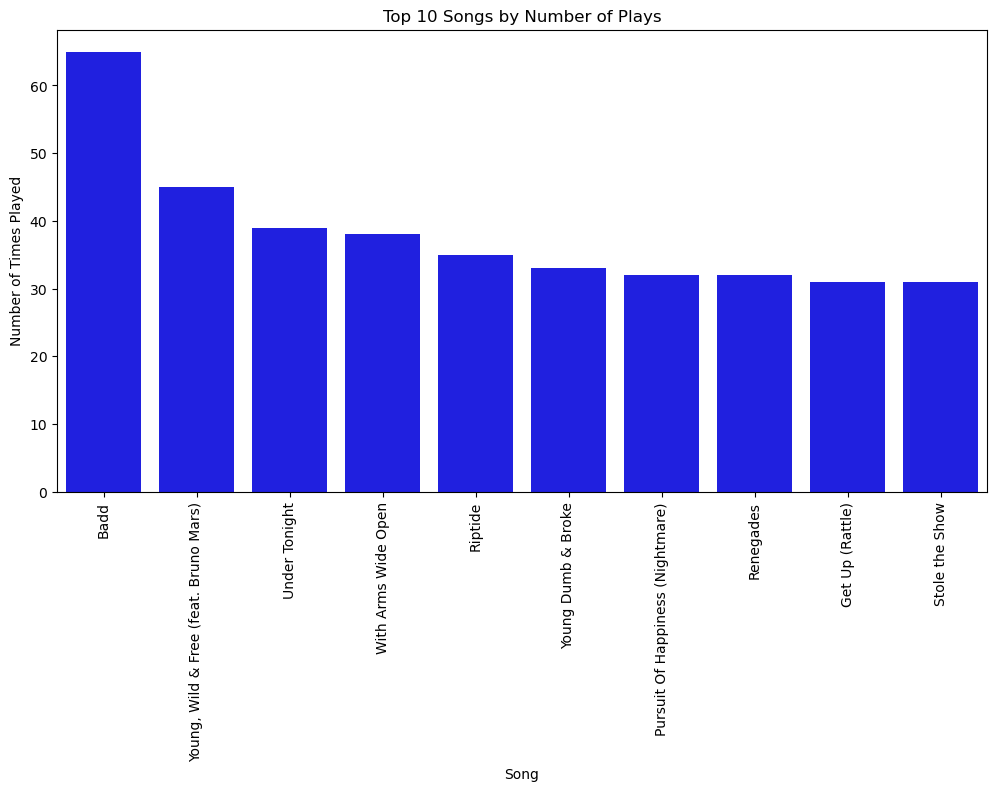

In [116]:
plt.figure(figsize=(12, 6))
sns.barplot(x='trackName', y='Times Played', data=top_songs, color='blue')
plt.xlabel('Song')
plt.ylabel('Number of Times Played')
plt.title('Top 10 Songs by Number of Plays')
plt.xticks(rotation=90) 
plt.show()
#This is only one example of the many graphs you can make. Different lines have different parameters. What is shown
# is only a fraction of the parameters to use. Each can be adjusted to provide a different graph. 